In [1]:
import pandas as pd

# Define the filenames and variable names
dataset_names = [
    "X_train", 
    "X_validate",
    "X_test", 
    "y_train", "y_validate", "train_df", "test_df"
]

# Load each dataset from CSV
datasets = {name: pd.read_csv(f"{name}.csv") for name in dataset_names}

# Unpack variables for direct usage
X_train = datasets["X_train"]
X_validate = datasets["X_validate"]
X_test = datasets["X_test"]
y_train = datasets["y_train"]
y_validate = datasets["y_validate"]
train_df = datasets["train_df"]
test_df = datasets["test_df"]

print("All datasets loaded successfully! 🎉")


All datasets loaded successfully! 🎉


In [2]:
train_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Group', 'MRP_per_unit_Weight',
       'Outlet_Age', 'Item_Category', 'Outlet_Total_Sales'],
      dtype='object')

In [3]:
X_train_clean = train_df[['Item_MRP', 'Outlet_Total_Sales' ]]
y_train_clean = train_df['Item_Outlet_Sales']
X_test = test_df[['Item_MRP', 'Outlet_Total_Sales' ]]

In [4]:
from sklearn.model_selection import train_test_split

# Splitting into training and validation sets
X_train, X_validate, y_train, y_validate = train_test_split(
    X_train_clean, y_train_clean, test_size=0.2, random_state=42
)

# Check the shape of the new splits
X_train.shape, X_validate.shape, y_train.shape, y_validate.shape



((6818, 2), (1705, 2), (6818,), (1705,))

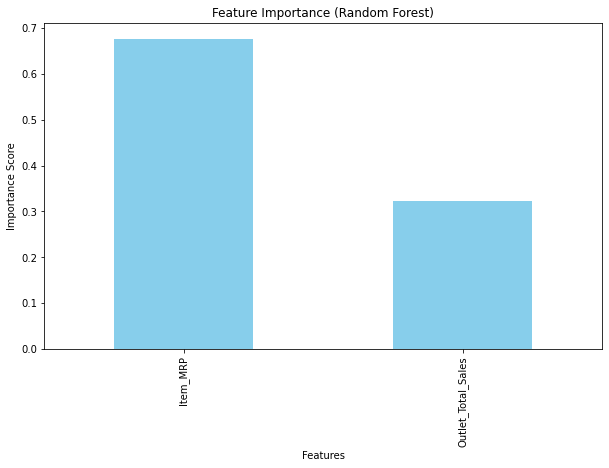

In [5]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd

# Initialize and train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns)

# Sort and visualize
plt.figure(figsize=(10, 6))
feature_importance.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()


In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on validation set
y_pred = rf.predict(X_validate)

# Compute error metrics
mae = mean_absolute_error(y_validate, y_pred)
mse = mean_squared_error(y_validate, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_validate, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 841.4536888661331
Mean Squared Error (MSE): 1469656.0691663905
Root Mean Squared Error (RMSE): 1212.293722315838
R² Score: 0.45928173116498283


In [7]:
X_train_clean = train_df[['Item_MRP', 'Outlet_Total_Sales', 'Item_Visibility' ]]
y_train_clean = train_df['Item_Outlet_Sales']
X_test = test_df[['Item_MRP', 'Outlet_Total_Sales', 'Item_Visibility']]

In [8]:
from sklearn.model_selection import train_test_split

# Splitting into training and validation sets
X_train, X_validate, y_train, y_validate = train_test_split(
    X_train_clean, y_train_clean, test_size=0.2, random_state=42
)

# Check the shape of the new splits
X_train.shape, X_validate.shape, y_train.shape, y_validate.shape



((6818, 3), (1705, 3), (6818,), (1705,))

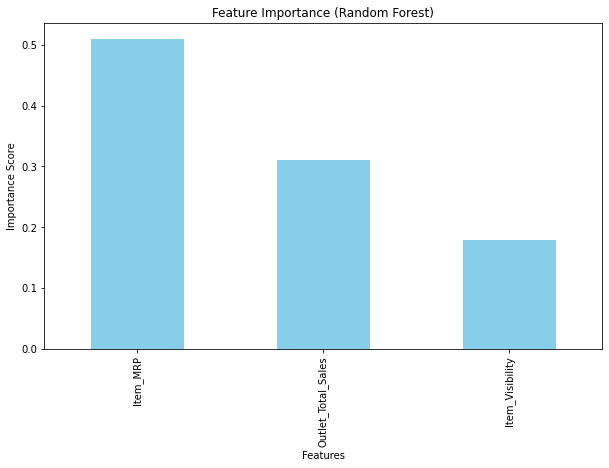

In [9]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd

# Initialize and train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns)

# Sort and visualize
plt.figure(figsize=(10, 6))
feature_importance.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on validation set
y_pred = rf.predict(X_validate)

# Compute error metrics
mae = mean_absolute_error(y_validate, y_pred)
mse = mean_squared_error(y_validate, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_validate, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 747.9430886674487
Mean Squared Error (MSE): 1150333.8735441705
Root Mean Squared Error (RMSE): 1072.5361875219737
R² Score: 0.5767672765520614


In [11]:
# Compute mean visibility per Item
item_mean_visibility = train_df.groupby('Item_Identifier')['Item_Visibility'].mean()

# Normalize Item Visibility
train_df['Item_Visibility_Normalized'] = train_df['Item_Visibility'] / train_df['Item_Identifier'].map(item_mean_visibility)
test_df['Item_Visibility_Normalized'] = test_df['Item_Visibility'] / test_df['Item_Identifier'].map(item_mean_visibility)


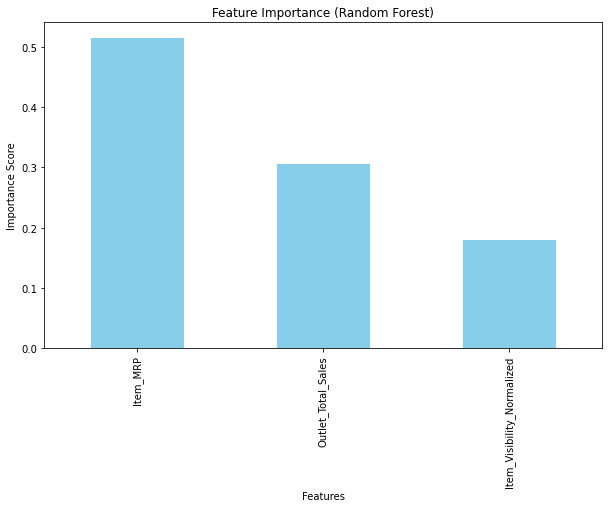

Mean Absolute Error (MAE): 780.1546059120235
Mean Squared Error (MSE): 1233385.6028663847
Root Mean Squared Error (RMSE): 1110.578949407193
R² Score: 0.5462107482288502


In [12]:
X_train_clean = train_df[['Item_MRP', 'Outlet_Total_Sales', 'Item_Visibility_Normalized' ]]
y_train_clean = train_df['Item_Outlet_Sales']
X_test = test_df[['Item_MRP', 'Outlet_Total_Sales', 'Item_Visibility_Normalized']]


from sklearn.model_selection import train_test_split

# Splitting into training and validation sets
X_train, X_validate, y_train, y_validate = train_test_split(
    X_train_clean, y_train_clean, test_size=0.2, random_state=42
)

# Check the shape of the new splits
X_train.shape, X_validate.shape, y_train.shape, y_validate.shape


from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd

# Initialize and train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns)

# Sort and visualize
plt.figure(figsize=(10, 6))
feature_importance.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()



from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on validation set
y_pred = rf.predict(X_validate)

# Compute error metrics
mae = mean_absolute_error(y_validate, y_pred)
mse = mean_squared_error(y_validate, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_validate, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


In [13]:
#pip install --upgrade scikit-learn


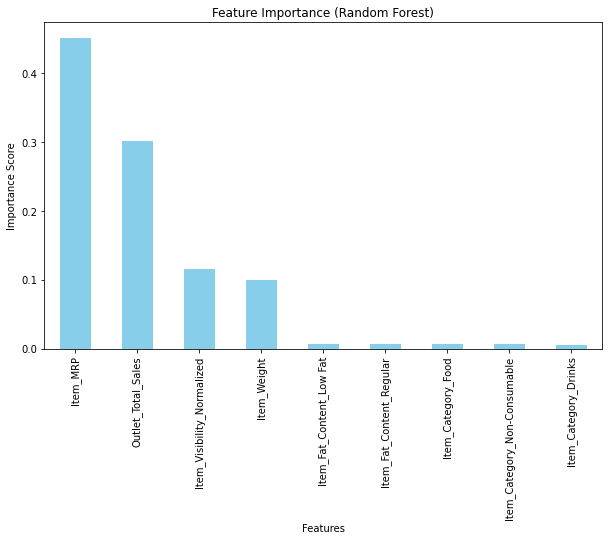

Mean Absolute Error (MAE): 755.027669265689
Mean Squared Error (MSE): 1163790.1366693776
Root Mean Squared Error (RMSE): 1078.7910532950195
R² Score: 0.571816426176451


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select features and target
X_train_clean = train_df[['Item_MRP', 'Outlet_Total_Sales', 'Item_Visibility_Normalized', 'Item_Weight', 'Item_Fat_Content', 'Item_Category']]
y_train_clean = train_df['Item_Outlet_Sales']
X_test = test_df[['Item_MRP', 'Outlet_Total_Sales', 'Item_Visibility_Normalized', 'Item_Weight', 'Item_Fat_Content', 'Item_Category']]

# Split data
X_train, X_validate, y_train, y_validate = train_test_split(X_train_clean, y_train_clean, test_size=0.2, random_state=42)

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit & transform categorical data
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_validate_encoded = encoder.transform(X_validate[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Convert encoded data into DataFrame
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoded_feature_names, index=X_train.index)
X_validate_encoded = pd.DataFrame(X_validate_encoded, columns=encoded_feature_names, index=X_validate.index)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoded_feature_names, index=X_test.index)

# Drop original categorical columns & merge encoded features
X_train = X_train.drop(columns=categorical_cols).reset_index(drop=True).join(X_train_encoded)
X_validate = X_validate.drop(columns=categorical_cols).reset_index(drop=True).join(X_validate_encoded)
X_test = X_test.drop(columns=categorical_cols).reset_index(drop=True).join(X_test_encoded)

# Handle missing values
imputer = SimpleImputer(strategy="median")
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_validate = pd.DataFrame(imputer.transform(X_validate), columns=X_validate.columns, index=X_validate.index)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)

# Train RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature Importance Plot
feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns)
plt.figure(figsize=(10, 6))
feature_importance.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

# Predict on validation set
y_pred = rf.predict(X_validate)

# Compute error metrics
mae = mean_absolute_error(y_validate, y_pred)
mse = mean_squared_error(y_validate, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_validate, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


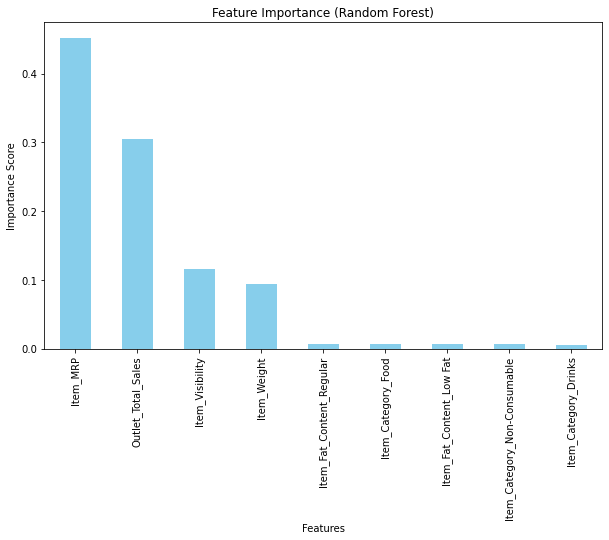

Mean Absolute Error (MAE): 746.0722843870968
Mean Squared Error (MSE): 1146839.7404669935
Root Mean Squared Error (RMSE): 1070.9060371792632
R² Score: 0.5780528437185631


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select features and target
X_train_clean = train_df[['Item_MRP', 'Outlet_Total_Sales', 'Item_Visibility', 'Item_Weight', 'Item_Fat_Content', 'Item_Category']]
y_train_clean = train_df['Item_Outlet_Sales']
X_test = test_df[['Item_MRP', 'Outlet_Total_Sales', 'Item_Visibility', 'Item_Weight', 'Item_Fat_Content', 'Item_Category']]

# Split data
X_train, X_validate, y_train, y_validate = train_test_split(X_train_clean, y_train_clean, test_size=0.2, random_state=42)

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit & transform categorical data
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_validate_encoded = encoder.transform(X_validate[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Convert encoded data into DataFrame
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoded_feature_names, index=X_train.index)
X_validate_encoded = pd.DataFrame(X_validate_encoded, columns=encoded_feature_names, index=X_validate.index)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoded_feature_names, index=X_test.index)

# Drop original categorical columns & merge encoded features
X_train = X_train.drop(columns=categorical_cols).reset_index(drop=True).join(X_train_encoded)
X_validate = X_validate.drop(columns=categorical_cols).reset_index(drop=True).join(X_validate_encoded)
X_test = X_test.drop(columns=categorical_cols).reset_index(drop=True).join(X_test_encoded)

# Handle missing values
imputer = SimpleImputer(strategy="median")
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_validate = pd.DataFrame(imputer.transform(X_validate), columns=X_validate.columns, index=X_validate.index)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)

# Train RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature Importance Plot
feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns)
plt.figure(figsize=(10, 6))
feature_importance.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

# Predict on validation set
y_pred = rf.predict(X_validate)

# Compute error metrics
mae = mean_absolute_error(y_validate, y_pred)
mse = mean_squared_error(y_validate, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_validate, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


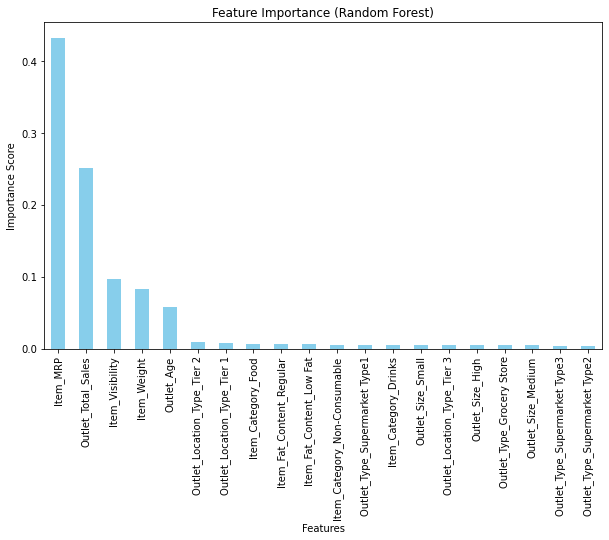

Mean Absolute Error (MAE): 739.2837719671554
Mean Squared Error (MSE): 1129863.5947054133
Root Mean Squared Error (RMSE): 1062.9504196835398
R² Score: 0.5842987350806824


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select features and target
X_train_clean = train_df[['Item_MRP', 'Outlet_Total_Sales', 'Item_Visibility', 'Item_Weight', 'Item_Fat_Content', 'Item_Category', 'Outlet_Age', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type']]
y_train_clean = train_df['Item_Outlet_Sales']
X_test = test_df[['Item_MRP', 'Outlet_Total_Sales', 'Item_Visibility', 'Item_Weight', 'Item_Fat_Content', 'Item_Category', 'Outlet_Age', 'Outlet_Size','Outlet_Location_Type','Outlet_Type']]

# Split data
X_train, X_validate, y_train, y_validate = train_test_split(X_train_clean, y_train_clean, test_size=0.2, random_state=42)

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit & transform categorical data
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_validate_encoded = encoder.transform(X_validate[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Convert encoded data into DataFrame
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoded_feature_names, index=X_train.index)
X_validate_encoded = pd.DataFrame(X_validate_encoded, columns=encoded_feature_names, index=X_validate.index)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoded_feature_names, index=X_test.index)

# Drop original categorical columns & merge encoded features
X_train = X_train.drop(columns=categorical_cols).reset_index(drop=True).join(X_train_encoded)
X_validate = X_validate.drop(columns=categorical_cols).reset_index(drop=True).join(X_validate_encoded)
X_test = X_test.drop(columns=categorical_cols).reset_index(drop=True).join(X_test_encoded)

# Handle missing values
imputer = SimpleImputer(strategy="median")
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_validate = pd.DataFrame(imputer.transform(X_validate), columns=X_validate.columns, index=X_validate.index)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)

# Train RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature Importance Plot
feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns)
plt.figure(figsize=(10, 6))
feature_importance.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

# Predict on validation set
y_pred = rf.predict(X_validate)

# Compute error metrics
mae = mean_absolute_error(y_validate, y_pred)
mse = mean_squared_error(y_validate, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_validate, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


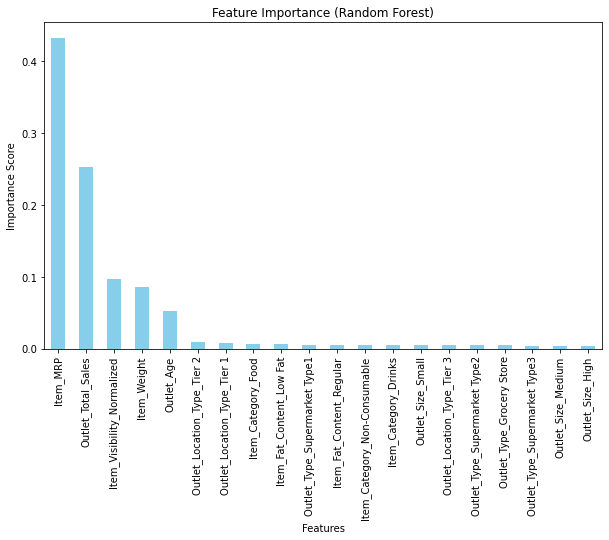

Mean Absolute Error (MAE): 752.4565527249267
Mean Squared Error (MSE): 1164061.1064587876
Root Mean Squared Error (RMSE): 1078.9166355464113
R² Score: 0.5717167305275777


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select features and target
X_train_clean = train_df[['Item_MRP', 'Outlet_Total_Sales', 'Item_Visibility_Normalized', 'Item_Weight', 'Item_Fat_Content', 'Item_Category', 'Outlet_Age', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type']]
y_train_clean = train_df['Item_Outlet_Sales']
X_test = test_df[['Item_MRP', 'Outlet_Total_Sales', 'Item_Visibility_Normalized', 'Item_Weight', 'Item_Fat_Content', 'Item_Category', 'Outlet_Age', 'Outlet_Size','Outlet_Location_Type','Outlet_Type']]

# Split data
X_train, X_validate, y_train, y_validate = train_test_split(X_train_clean, y_train_clean, test_size=0.2, random_state=42)

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit & transform categorical data
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_validate_encoded = encoder.transform(X_validate[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Convert encoded data into DataFrame
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoded_feature_names, index=X_train.index)
X_validate_encoded = pd.DataFrame(X_validate_encoded, columns=encoded_feature_names, index=X_validate.index)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoded_feature_names, index=X_test.index)

# Drop original categorical columns & merge encoded features
X_train = X_train.drop(columns=categorical_cols).reset_index(drop=True).join(X_train_encoded)
X_validate = X_validate.drop(columns=categorical_cols).reset_index(drop=True).join(X_validate_encoded)
X_test = X_test.drop(columns=categorical_cols).reset_index(drop=True).join(X_test_encoded)

# Handle missing values
imputer = SimpleImputer(strategy="median")
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_validate = pd.DataFrame(imputer.transform(X_validate), columns=X_validate.columns, index=X_validate.index)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)

# Train RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature Importance Plot
feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns)
plt.figure(figsize=(10, 6))
feature_importance.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

# Predict on validation set
y_pred = rf.predict(X_validate)

# Compute error metrics
mae = mean_absolute_error(y_validate, y_pred)
mse = mean_squared_error(y_validate, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_validate, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


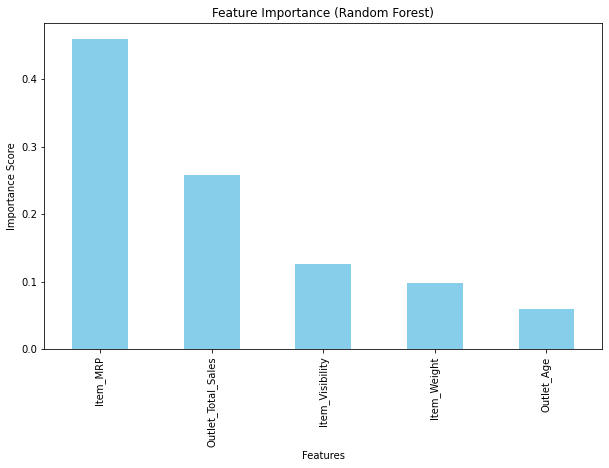

Mean Absolute Error (MAE): 743.9813326533724
Mean Squared Error (MSE): 1135369.159696669
Root Mean Squared Error (RMSE): 1065.5370287778221
R² Score: 0.5822731185888463


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select features and target
X_train_clean = train_df[['Item_MRP', 'Outlet_Total_Sales', 'Item_Visibility', 'Item_Weight', 'Outlet_Age']]
y_train_clean = train_df['Item_Outlet_Sales']
X_test = test_df[['Item_MRP', 'Outlet_Total_Sales', 'Item_Visibility', 'Item_Weight', 'Outlet_Age']]

# Split data
X_train, X_validate, y_train, y_validate = train_test_split(X_train_clean, y_train_clean, test_size=0.2, random_state=42)

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit & transform categorical data
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_validate_encoded = encoder.transform(X_validate[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Convert encoded data into DataFrame
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoded_feature_names, index=X_train.index)
X_validate_encoded = pd.DataFrame(X_validate_encoded, columns=encoded_feature_names, index=X_validate.index)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoded_feature_names, index=X_test.index)

# Drop original categorical columns & merge encoded features
X_train = X_train.drop(columns=categorical_cols).reset_index(drop=True).join(X_train_encoded)
X_validate = X_validate.drop(columns=categorical_cols).reset_index(drop=True).join(X_validate_encoded)
X_test = X_test.drop(columns=categorical_cols).reset_index(drop=True).join(X_test_encoded)

# Handle missing values
imputer = SimpleImputer(strategy="median")
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_validate = pd.DataFrame(imputer.transform(X_validate), columns=X_validate.columns, index=X_validate.index)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)

# Train RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature Importance Plot
feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns)
plt.figure(figsize=(10, 6))
feature_importance.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

# Predict on validation set
y_pred = rf.predict(X_validate)

# Compute error metrics
mae = mean_absolute_error(y_validate, y_pred)
mse = mean_squared_error(y_validate, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_validate, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


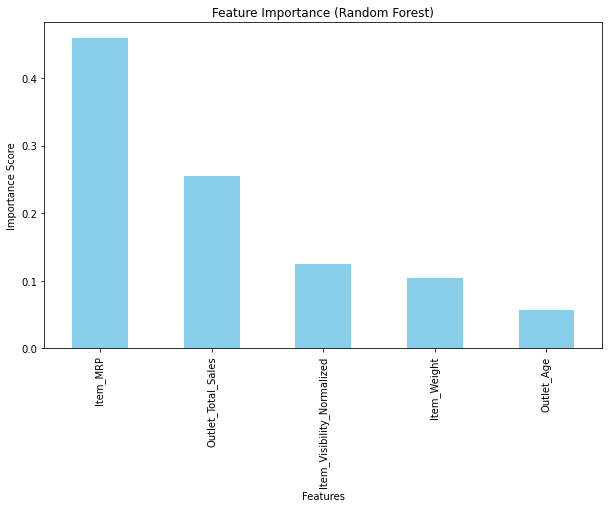

Mean Absolute Error (MAE): 756.7268377255132
Mean Squared Error (MSE): 1165271.6409670613
Root Mean Squared Error (RMSE): 1079.4774851598625
R² Score: 0.5712713486879679


In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select features and target
X_train_clean = train_df[['Item_MRP', 'Outlet_Total_Sales', 'Item_Visibility_Normalized', 'Item_Weight', 'Outlet_Age']]
y_train_clean = train_df['Item_Outlet_Sales']
X_test = test_df[['Item_MRP', 'Outlet_Total_Sales', 'Item_Visibility_Normalized', 'Item_Weight', 'Outlet_Age']]

# Split data
X_train, X_validate, y_train, y_validate = train_test_split(X_train_clean, y_train_clean, test_size=0.2, random_state=42)

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit & transform categorical data
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_validate_encoded = encoder.transform(X_validate[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Convert encoded data into DataFrame
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoded_feature_names, index=X_train.index)
X_validate_encoded = pd.DataFrame(X_validate_encoded, columns=encoded_feature_names, index=X_validate.index)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoded_feature_names, index=X_test.index)

# Drop original categorical columns & merge encoded features
X_train = X_train.drop(columns=categorical_cols).reset_index(drop=True).join(X_train_encoded)
X_validate = X_validate.drop(columns=categorical_cols).reset_index(drop=True).join(X_validate_encoded)
X_test = X_test.drop(columns=categorical_cols).reset_index(drop=True).join(X_test_encoded)

# Handle missing values
imputer = SimpleImputer(strategy="median")
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_validate = pd.DataFrame(imputer.transform(X_validate), columns=X_validate.columns, index=X_validate.index)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)

# Train RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature Importance Plot
feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns)
plt.figure(figsize=(10, 6))
feature_importance.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

# Predict on validation set
y_pred = rf.predict(X_validate)

# Compute error metrics
mae = mean_absolute_error(y_validate, y_pred)
mse = mean_squared_error(y_validate, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_validate, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select features and target
X_train_clean = train_df[['Item_MRP', 'Outlet_Total_Sales', 'Item_Visibility', 'Item_Weight', 'Item_Fat_Content', 'Item_Category', 'Outlet_Age', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type']]
y_train_clean = train_df['Item_Outlet_Sales']
X_test = test_df[['Item_MRP', 'Outlet_Total_Sales', 'Item_Visibility', 'Item_Weight', 'Item_Fat_Content', 'Item_Category', 'Outlet_Age', 'Outlet_Size','Outlet_Location_Type','Outlet_Type']]

# Split data
X_train, X_validate, y_train, y_validate = train_test_split(X_train_clean, y_train_clean, test_size=0.2, random_state=42)

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit & transform categorical data
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_validate_encoded = encoder.transform(X_validate[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Convert encoded data into DataFrame
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoded_feature_names, index=X_train.index)
X_validate_encoded = pd.DataFrame(X_validate_encoded, columns=encoded_feature_names, index=X_validate.index)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoded_feature_names, index=X_test.index)

# Drop original categorical columns & merge encoded features
X_train = X_train.drop(columns=categorical_cols).reset_index(drop=True).join(X_train_encoded)
X_validate = X_validate.drop(columns=categorical_cols).reset_index(drop=True).join(X_validate_encoded)
X_test = X_test.drop(columns=categorical_cols).reset_index(drop=True).join(X_test_encoded)

# Handle missing values
imputer = SimpleImputer(strategy="median")
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_validate = pd.DataFrame(imputer.transform(X_validate), columns=X_validate.columns, index=X_validate.index)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of trees
    'max_depth': [10, 20, 30, 40, None],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples to split
    'min_samples_leaf': [1, 2, 4],  # Minimum samples in leaf
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features per split
}

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,  # Number of random settings to try
    scoring='neg_root_mean_squared_error',  # Optimize for lowest RMSE
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1  # Use all CPU cores
)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the final model with best parameters
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Predict on validation set
y_pred = best_rf.predict(X_validate)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_validate, y_pred)
mse = mean_squared_error(y_validate, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_validate, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/uniquenetra/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/uniquenetra/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/uniquenetra/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Users/uniquenetra/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_pa

Best Hyperparameters: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20}
Mean Absolute Error (MAE): 729.7483995684042
Mean Squared Error (MSE): 1069823.6898768195
Root Mean Squared Error (RMSE): 1034.3228170531768
R² Score: 0.6063887152338967


In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select features and target
X_train_clean = train_df[['Item_MRP', 'Outlet_Total_Sales', 'Item_Visibility', 'Item_Weight', 'Item_Fat_Content', 'Item_Category', 'Outlet_Age', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type']]
y_train_clean = train_df['Item_Outlet_Sales']
X_test = test_df[['Item_MRP', 'Outlet_Total_Sales', 'Item_Visibility', 'Item_Weight', 'Item_Fat_Content', 'Item_Category', 'Outlet_Age', 'Outlet_Size','Outlet_Location_Type','Outlet_Type']]

# Split data
X_train, X_validate, y_train, y_validate = train_test_split(X_train_clean, y_train_clean, test_size=0.2, random_state=42)

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit & transform categorical data
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_validate_encoded = encoder.transform(X_validate[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Convert encoded data into DataFrame
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoded_feature_names, index=X_train.index)
X_validate_encoded = pd.DataFrame(X_validate_encoded, columns=encoded_feature_names, index=X_validate.index)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoded_feature_names, index=X_test.index)

# Drop original categorical columns & merge encoded features
X_train = X_train.drop(columns=categorical_cols).reset_index(drop=True).join(X_train_encoded)
X_validate = X_validate.drop(columns=categorical_cols).reset_index(drop=True).join(X_validate_encoded)
X_test = X_test.drop(columns=categorical_cols).reset_index(drop=True).join(X_test_encoded)

# Handle missing values
imputer = SimpleImputer(strategy="median")
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_validate = pd.DataFrame(imputer.transform(X_validate), columns=X_validate.columns, index=X_validate.index)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)


import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Convert data into DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_validate, label=y_validate)
dtest = xgb.DMatrix(X_test)

# Define XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # Regression task
    'eval_metric': 'rmse',  # Root Mean Squared Error
    'learning_rate': 0.05,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# Train the model using XGBoost's native API
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
xgb_model = xgb.train(params, dtrain, num_boost_round=1000, 
                      evals=watchlist, early_stopping_rounds=50, verbose_eval=100)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on validation set
y_valid_pred = xgb_model.predict(dvalid)

# Evaluate performance
mae = mean_absolute_error(y_validate, y_valid_pred)
mse = mean_squared_error(y_validate, y_valid_pred)
rmse = mse ** 0.5
r2 = r2_score(y_validate, y_valid_pred)

print("\n✅ Model Performance on Validation Set:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


# Make predictions on test set
y_test_pred = xgb_model.predict(dtest)

# Create submission file
submission = test_df[['Item_Identifier', 'Outlet_Identifier']].copy()
submission['Item_Outlet_Sales'] = y_test_pred

submission['Item_Outlet_Sales'] = y_test_pred.clip(min=0)

# Save CSV
submission.to_csv('../submission/submission_xgboost.csv', index=False)

print("Download your submission file: /mnt/data/submission_xgboost.csv")


[0]	train-rmse:1698.35168	eval-rmse:1630.73575
[100]	train-rmse:964.28287	eval-rmse:1029.26817
[127]	train-rmse:929.87365	eval-rmse:1035.51957

✅ Model Performance on Validation Set:
MAE: 721.9826
MSE: 1071939.5169
RMSE: 1035.3451
R² Score: 0.6056
Download your submission file: /mnt/data/submission_xgboost.csv


In [169]:
import optuna
import xgboost as xgb
from sklearn.metrics import mean_squared_error

def objective(trial):
    params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 200, 1000),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 10.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 10.0),
    }

    model = xgb.XGBRegressor(**params)
    # ✅ Train without early stopping
    model.fit(X_train, y_train, eval_set=[(X_validate, y_validate)], verbose=False) 
    

    
    preds = model.predict(X_validate)
    rmse = mean_squared_error(y_validate, preds, squared=False)
    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)

print("Best Parameters:", study.best_params)


[I 2025-03-17 14:50:40,267] A new study created in memory with name: no-name-f5a66b28-faad-4933-9690-8a6798643d82
[I 2025-03-17 14:50:41,880] Trial 0 finished with value: 1058.659966053309 and parameters: {'learning_rate': 0.020880991834224046, 'max_depth': 8, 'subsample': 0.8060891410858717, 'colsample_bytree': 0.6331088974542252, 'n_estimators': 466, 'reg_lambda': 7.29577800563918, 'reg_alpha': 6.4629687110650345}. Best is trial 0 with value: 1058.659966053309.
[I 2025-03-17 14:50:42,361] Trial 1 finished with value: 1050.9991771548698 and parameters: {'learning_rate': 0.09857560259110733, 'max_depth': 3, 'subsample': 0.5250991257190979, 'colsample_bytree': 0.9976837800649796, 'n_estimators': 310, 'reg_lambda': 1.0007073455899618, 'reg_alpha': 0.2520122901011799}. Best is trial 1 with value: 1050.9991771548698.
[I 2025-03-17 14:50:44,983] Trial 2 finished with value: 1137.898351183729 and parameters: {'learning_rate': 0.06875138899644681, 'max_depth': 9, 'subsample': 0.80304238697271

Best Parameters: {'learning_rate': 0.02391025522274382, 'max_depth': 4, 'subsample': 0.8495259961197758, 'colsample_bytree': 0.9369813695891052, 'n_estimators': 203, 'reg_lambda': 8.234399349113541, 'reg_alpha': 2.2372551373857306}


In [170]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define LightGBM parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'max_depth': -1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'n_estimators': 500,
    'reg_lambda': 5.0,
    'reg_alpha': 5.0
}

# Initialize model
model = lgb.LGBMRegressor(**params)

# Train
model.fit(
    X_train, y_train,
    eval_set=[(X_validate, y_validate)],
    eval_metric="rmse",
    callbacks=[lgb.early_stopping(50, verbose=True)]
)


# Predictions
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_validate)

# Evaluate performance
def evaluate_model(y_true, y_pred, dataset_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_true, y_pred)

    print(f"\n✅ Model Performance on {dataset_name}:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

evaluate_model(y_train, y_train_pred, "Training Set")
evaluate_model(y_validate, y_valid_pred, "Validation Set")


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[69]	valid_0's rmse: 1022.55

✅ Model Performance on Training Set:
MAE: 724.0806
MSE: 1027474.2948
RMSE: 1013.6441
R² Score: 0.6527

✅ Model Performance on Validation Set:
MAE: 721.2508
MSE: 1045617.2787
RMSE: 1022.5543
R² Score: 0.6153


In [171]:
import optuna
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

def objective(trial):
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.05),
        'num_leaves': trial.suggest_int('num_leaves', 20, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 10.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 10.0),
        'n_estimators': 300,  # Keeping it fixed for now
    }

    model = lgb.LGBMRegressor(**params)
    eval_result = {}
    model.fit(
        X_train, y_train, 
        eval_set=[(X_validate, y_validate)], 
        eval_metric='rmse',
        callbacks=[lgb.early_stopping(50, verbose=False),  # Stops early if no improvement
                   lgb.record_evaluation(eval_result)]
    )
    
    preds = model.predict(X_validate)
    rmse = mean_squared_error(y_validate, preds, squared=False)
    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)  # Increase trials for better tuning

print("Best Parameters:", study.best_params)


[I 2025-03-17 14:51:05,328] A new study created in memory with name: no-name-212b0da8-67e3-4a8b-ad47-763763d9c3e2
[I 2025-03-17 14:51:05,510] Trial 0 finished with value: 1054.5138381354018 and parameters: {'learning_rate': 0.007566886796334379, 'num_leaves': 40, 'max_depth': 3, 'min_child_samples': 52, 'colsample_bytree': 0.8207475199162693, 'subsample': 0.88071645651507, 'reg_lambda': 5.339616928459151, 'reg_alpha': 1.8376780231603427}. Best is trial 0 with value: 1054.5138381354018.
[I 2025-03-17 14:51:05,825] Trial 1 finished with value: 1020.1212660981594 and parameters: {'learning_rate': 0.01997597443380505, 'num_leaves': 188, 'max_depth': 14, 'min_child_samples': 74, 'colsample_bytree': 0.7958917975606847, 'subsample': 0.5530561711912172, 'reg_lambda': 4.621956679506751, 'reg_alpha': 7.529478544280747}. Best is trial 1 with value: 1020.1212660981594.
[I 2025-03-17 14:51:06,154] Trial 2 finished with value: 1041.6235613331173 and parameters: {'learning_rate': 0.006735603414397984

[I 2025-03-17 14:51:12,223] Trial 22 finished with value: 1018.7883367573378 and parameters: {'learning_rate': 0.018204820464940753, 'num_leaves': 103, 'max_depth': 7, 'min_child_samples': 84, 'colsample_bytree': 0.7701359782331083, 'subsample': 0.9975316202958213, 'reg_lambda': 7.697272150270397, 'reg_alpha': 3.6307197468771966}. Best is trial 19 with value: 1016.0182645727523.
[I 2025-03-17 14:51:12,473] Trial 23 finished with value: 1018.9516456868101 and parameters: {'learning_rate': 0.027810624426066247, 'num_leaves': 65, 'max_depth': 6, 'min_child_samples': 100, 'colsample_bytree': 0.681132582444173, 'subsample': 0.7266641374056465, 'reg_lambda': 6.640300653285112, 'reg_alpha': 4.7287449017829735}. Best is trial 19 with value: 1016.0182645727523.
[I 2025-03-17 14:51:12,839] Trial 24 finished with value: 1019.025881233522 and parameters: {'learning_rate': 0.015821787442548432, 'num_leaves': 71, 'max_depth': 9, 'min_child_samples': 91, 'colsample_bytree': 0.8511563791300363, 'subsa

[I 2025-03-17 14:51:16,677] Trial 44 finished with value: 1016.3595293565678 and parameters: {'learning_rate': 0.04365600298434924, 'num_leaves': 79, 'max_depth': 3, 'min_child_samples': 89, 'colsample_bytree': 0.800281637250524, 'subsample': 0.7028147946375716, 'reg_lambda': 9.442796591285806, 'reg_alpha': 1.5594428334250476}. Best is trial 41 with value: 1014.9903273591577.
[I 2025-03-17 14:51:16,822] Trial 45 finished with value: 1014.5259639355808 and parameters: {'learning_rate': 0.035553797150789206, 'num_leaves': 95, 'max_depth': 4, 'min_child_samples': 74, 'colsample_bytree': 0.8701940463691253, 'subsample': 0.7835356269503433, 'reg_lambda': 8.56062711057721, 'reg_alpha': 2.224650020348358}. Best is trial 45 with value: 1014.5259639355808.
[I 2025-03-17 14:51:16,964] Trial 46 finished with value: 1016.1762489667086 and parameters: {'learning_rate': 0.034583174731222174, 'num_leaves': 93, 'max_depth': 4, 'min_child_samples': 94, 'colsample_bytree': 0.831687625378049, 'subsample'

Best Parameters: {'learning_rate': 0.037194017670424295, 'num_leaves': 56, 'max_depth': 4, 'min_child_samples': 73, 'colsample_bytree': 0.8624922679373095, 'subsample': 0.8742859188199799, 'reg_lambda': 9.614155761347542, 'reg_alpha': 0.5757394616383451}


In [172]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define LightGBM parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.02,
    'num_leaves': 150,
    'max_depth': 5,
    'min_child_samples': 50,
    'subsample': 0.9,
    'colsample_bytree': 0.9,
    'n_estimators': 500,
    'reg_lambda': 7.7,
    'reg_alpha': 10,
    'n_estimators': 500
    
}

# Initialize model
model = lgb.LGBMRegressor(**params)

# Train
model.fit(
    X_train, y_train,
    eval_set=[(X_validate, y_validate)],
    eval_metric="rmse",
    callbacks=[lgb.early_stopping(50, verbose=True)]
)


# Predictions
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_validate)

# Evaluate performance
def evaluate_model(y_true, y_pred, dataset_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_true, y_pred)

    print(f"\n✅ Model Performance on {dataset_name}:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

evaluate_model(y_train, y_train_pred, "Training Set")
evaluate_model(y_validate, y_valid_pred, "Validation Set")


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[223]	valid_0's rmse: 1014.81

✅ Model Performance on Training Set:
MAE: 737.2362
MSE: 1095111.6472
RMSE: 1046.4758
R² Score: 0.6298

✅ Model Performance on Validation Set:
MAE: 709.2125
MSE: 1029839.9909
RMSE: 1014.8103
R² Score: 0.6211


In [173]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Best parameters from Optuna
best_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.02,
    'num_leaves': 150,
    'max_depth': 5,
    'min_child_samples': 50,
    'subsample': 0.9,
    'colsample_bytree': 0.9,
    'n_estimators': 500,
    'reg_lambda': 7.7,
    'reg_alpha': 10,
    'n_estimators': 500
}


# Train model
model = LGBMRegressor(**best_params)
model.fit(X_train, y_train, 
          eval_set=[(X_validate, y_validate)], 
          eval_metric='rmse', 
          callbacks=[lgb.early_stopping(50, verbose=False)])

# Predict on training & validation sets
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_validate)

# Evaluate performance
def evaluate(y_true, y_pred, dataset):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n✅ Model Performance on {dataset}:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

# Show results
evaluate(y_train, y_train_pred, "Training Set")
evaluate(y_validate, y_valid_pred, "Validation Set")

# Predict on test set
y_test_preds = model.predict(X_test)

# Create submission file
submission = test_df[['Item_Identifier', 'Outlet_Identifier']].copy()
submission['Item_Outlet_Sales'] = y_test_preds

submission['Item_Outlet_Sales'] = y_test_preds.clip(min=0)

# Save CSV
submission.to_csv('../submission/submission_lgb.csv', index=False)

print("Download your submission file: /mnt/data/submission_xgboost.csv")




✅ Model Performance on Training Set:
MAE: 737.2362
MSE: 1095111.6472
RMSE: 1046.4758
R² Score: 0.6298

✅ Model Performance on Validation Set:
MAE: 709.2125
MSE: 1029839.9909
RMSE: 1014.8103
R² Score: 0.6211
Download your submission file: /mnt/data/submission_xgboost.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select features and target
X_train_clean = train_df[['Item_MRP', 'Outlet_Total_Sales', 'Item_Visibility', 'Item_Weight', 'Item_Fat_Content', 'Item_Category', 'Outlet_Age', 'Outlet_Location_Type','Outlet_Type']]
y_train_clean = train_df['Item_Outlet_Sales']
X_test = test_df[['Item_MRP', 'Outlet_Total_Sales', 'Item_Visibility', 'Item_Weight', 'Item_Fat_Content', 'Item_Category', 'Outlet_Age','Outlet_Location_Type','Outlet_Type']]

# Split data
X_train, X_validate, y_train, y_validate = train_test_split(X_train_clean, y_train_clean, test_size=0.2, random_state=42)

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit & transform categorical data
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_validate_encoded = encoder.transform(X_validate[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Convert encoded data into DataFrame
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoded_feature_names, index=X_train.index)
X_validate_encoded = pd.DataFrame(X_validate_encoded, columns=encoded_feature_names, index=X_validate.index)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoded_feature_names, index=X_test.index)

# Drop original categorical columns & merge encoded features
X_train = X_train.drop(columns=categorical_cols).reset_index(drop=True).join(X_train_encoded)
X_validate = X_validate.drop(columns=categorical_cols).reset_index(drop=True).join(X_validate_encoded)
X_test = X_test.drop(columns=categorical_cols).reset_index(drop=True).join(X_test_encoded)

# Handle missing values
imputer = SimpleImputer(strategy="median")
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_validate = pd.DataFrame(imputer.transform(X_validate), columns=X_validate.columns, index=X_validate.index)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of trees
    'max_depth': [10, 20, 30, 40, None],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples to split
    'min_samples_leaf': [1, 2, 4],  # Minimum samples in leaf
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features per split
}

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,  # Number of random settings to try
    scoring='neg_root_mean_squared_error',  # Optimize for lowest RMSE
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1  # Use all CPU cores
)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the final model with best parameters
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Predict on validation set
y_pred = best_rf.predict(X_validate)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_validate, y_pred)
mse = mean_squared_error(y_validate, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_validate, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
import optuna
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

def objective(trial):
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.05),
        'num_leaves': trial.suggest_int('num_leaves', 20, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 10.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 10.0),
        'n_estimators': 300,  # Keeping it fixed for now
    }

    model = lgb.LGBMRegressor(**params)
    eval_result = {}
    model.fit(
        X_train, y_train, 
        eval_set=[(X_validate, y_validate)], 
        eval_metric='rmse',
        callbacks=[lgb.early_stopping(50, verbose=False),  # Stops early if no improvement
                   lgb.record_evaluation(eval_result)]
    )
    
    preds = model.predict(X_validate)
    rmse = mean_squared_error(y_validate, preds, squared=False)
    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)  # Increase trials for better tuning

print("Best Parameters:", study.best_params)


In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Best parameters from Optuna
best_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.015,
    'num_leaves': 120,
    'max_depth': 4,
    'min_child_samples': 45,
    'subsample': 0.9,
    'colsample_bytree': 0.85,
    'n_estimators': 2000,
    'reg_lambda': 3.85,
    'reg_alpha': 9,
}


# Train model
model = LGBMRegressor(**best_params)
model.fit(X_train, y_train, 
          eval_set=[(X_validate, y_validate)], 
          eval_metric='rmse', 
          callbacks=[lgb.early_stopping(50, verbose=False)])

# Predict on training & validation sets
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_validate)

# Evaluate performance
def evaluate(y_true, y_pred, dataset):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n✅ Model Performance on {dataset}:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

# Show results
evaluate(y_train, y_train_pred, "Training Set")
evaluate(y_validate, y_valid_pred, "Validation Set")

# Predict on test set
y_test_preds = model.predict(X_test)

# Create submission file
submission = test_df[['Item_Identifier', 'Outlet_Identifier']].copy()
submission['Item_Outlet_Sales'] = y_test_preds

submission['Item_Outlet_Sales'] = y_test_preds.clip(min=0)

# Save CSV
submission.to_csv('../submission/submission_lgb.csv', index=False)

print("Download your submission file: /mnt/data/submission_xgboost.csv")



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select features and target
X_train_clean = train_df[['Item_MRP', 'Outlet_Total_Sales', 'Item_Visibility', 'Item_Weight', 'Item_Fat_Content', 'Item_Category', 'Outlet_Age', 'Outlet_Location_Type']]
y_train_clean = train_df['Item_Outlet_Sales']
X_test = test_df[['Item_MRP', 'Outlet_Total_Sales', 'Item_Visibility', 'Item_Weight', 'Item_Fat_Content', 'Item_Category', 'Outlet_Age','Outlet_Location_Type']]

# Split data
X_train, X_validate, y_train, y_validate = train_test_split(X_train_clean, y_train_clean, test_size=0.2, random_state=42)

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit & transform categorical data
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_validate_encoded = encoder.transform(X_validate[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Convert encoded data into DataFrame
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoded_feature_names, index=X_train.index)
X_validate_encoded = pd.DataFrame(X_validate_encoded, columns=encoded_feature_names, index=X_validate.index)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoded_feature_names, index=X_test.index)

# Drop original categorical columns & merge encoded features
X_train = X_train.drop(columns=categorical_cols).reset_index(drop=True).join(X_train_encoded)
X_validate = X_validate.drop(columns=categorical_cols).reset_index(drop=True).join(X_validate_encoded)
X_test = X_test.drop(columns=categorical_cols).reset_index(drop=True).join(X_test_encoded)

# Handle missing values
imputer = SimpleImputer(strategy="median")
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_validate = pd.DataFrame(imputer.transform(X_validate), columns=X_validate.columns, index=X_validate.index)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of trees
    'max_depth': [10, 20, 30, 40, None],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples to split
    'min_samples_leaf': [1, 2, 4],  # Minimum samples in leaf
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features per split
}

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,  # Number of random settings to try
    scoring='neg_root_mean_squared_error',  # Optimize for lowest RMSE
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1  # Use all CPU cores
)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the final model with best parameters
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Predict on validation set
y_pred = best_rf.predict(X_validate)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_validate, y_pred)
mse = mean_squared_error(y_validate, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_validate, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


In [ ]:
import pandas as pd
import numpy as np
import optuna
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Select features and target
categorical_cols = ['Item_Fat_Content', 'Item_Category', 'Outlet_Location_Type', 'Outlet_Type']
numerical_cols = ['Item_MRP', 'Outlet_Total_Sales', 'Item_Visibility', 'Item_Weight', 'Outlet_Age']

# Ensure categorical columns are treated as category dtype
for col in categorical_cols:
    train_df[col] = train_df[col].astype('category')
    test_df[col] = test_df[col].astype('category')

# Select X and y
X = train_df[numerical_cols + categorical_cols]
y = train_df['Item_Outlet_Sales']
X_test = test_df[numerical_cols + categorical_cols]

# Split data
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.05),
        'num_leaves': trial.suggest_int('num_leaves', 20, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 10.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 10.0),
        'n_estimators': 300,  # Keeping it fixed for now
    }

    model = lgb.LGBMRegressor(**params)

    eval_result = {}
    model.fit(
        X_train, y_train, 
        eval_set=[(X_validate, y_validate)], 
        eval_metric='rmse',
        categorical_feature=categorical_cols,  # Pass categorical features!
        callbacks=[lgb.early_stopping(50, verbose=False), lgb.record_evaluation(eval_result)]
    )
    
    preds = model.predict(X_validate)
    rmse = mean_squared_error(y_validate, preds, squared=False)
    return rmse

# Run Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)  # Increase trials for better tuning

print("Best Parameters:", study.best_params)


In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Best parameters from Optuna
best_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.017,
    'num_leaves': 120,
    'max_depth': 5,
    'min_child_samples': 50,
    'subsample': 0.9,
    'colsample_bytree': 0.73,
    'n_estimators': 2000,
    'reg_lambda': 9.5,
    'reg_alpha': 3.65,
}


# Train model
model = LGBMRegressor(**best_params)
model.fit(X_train, y_train, 
          eval_set=[(X_validate, y_validate)], 
          eval_metric='rmse', 
          callbacks=[lgb.early_stopping(50, verbose=False)])

# Predict on training & validation sets
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_validate)

# Evaluate performance
def evaluate(y_true, y_pred, dataset):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n✅ Model Performance on {dataset}:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

# Show results
evaluate(y_train, y_train_pred, "Training Set")
evaluate(y_validate, y_valid_pred, "Validation Set")

# Predict on test set
y_test_preds = model.predict(X_test)

# Create submission file
submission = test_df[['Item_Identifier', 'Outlet_Identifier']].copy()
submission['Item_Outlet_Sales'] = y_test_preds

submission['Item_Outlet_Sales'] = y_test_preds.clip(min=0)

# Save CSV
submission.to_csv('../submission/submission_lgb.csv', index=False)

print("Download your submission file: /mnt/data/submission_xgboost.csv")



In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Best parameters from Optuna
best_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.01,
    'num_leaves': 150,
    'max_depth': 5,
    'min_child_samples': 50,
    'subsample': 1,
    'colsample_bytree': 0.73,
    'n_estimators': 3000,
    'reg_lambda': 9.5,
    'reg_alpha': 4,
}


# Train model
model = LGBMRegressor(**best_params)
model.fit(X_train, y_train, 
          eval_set=[(X_validate, y_validate)], 
          eval_metric='rmse', 
          callbacks=[lgb.early_stopping(50, verbose=False)])

# Predict on training & validation sets
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_validate)

# Evaluate performance
def evaluate(y_true, y_pred, dataset):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n✅ Model Performance on {dataset}:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

# Show results
evaluate(y_train, y_train_pred, "Training Set")
evaluate(y_validate, y_valid_pred, "Validation Set")

# Predict on test set
y_test_preds = model.predict(X_test)

# Create submission file
submission = test_df[['Item_Identifier', 'Outlet_Identifier']].copy()
submission['Item_Outlet_Sales'] = y_test_preds

submission['Item_Outlet_Sales'] = y_test_preds.clip(min=0)

# Save CSV
submission.to_csv('../submission/submission_lgb.csv', index=False)

print("Download your submission file: /mnt/data/submission_xgboost.csv")



In [ ]:

import pandas as pd
import numpy as np
import optuna
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Select features and target
categorical_cols = ['Item_Fat_Content', 'Item_Category', 'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Size']
numerical_cols = ['Item_MRP', 'Outlet_Total_Sales', 'Item_Visibility', 'Item_Weight', 'Outlet_Age']

# Ensure categorical columns are treated as category dtype
for col in categorical_cols:
    train_df[col] = train_df[col].astype('category')
    test_df[col] = test_df[col].astype('category')

# Select X and y
X = train_df[numerical_cols + categorical_cols]
y = train_df['Item_Outlet_Sales']
X_test = test_df[numerical_cols + categorical_cols]

# Split data
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.05),
        'num_leaves': trial.suggest_int('num_leaves', 20, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 10.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 10.0),
        'n_estimators': 300,  # Keeping it fixed for now
    }

    model = lgb.LGBMRegressor(**params)

    eval_result = {}
    model.fit(
        X_train, y_train, 
        eval_set=[(X_validate, y_validate)], 
        eval_metric='rmse',
        categorical_feature=categorical_cols,  # Pass categorical features!
        callbacks=[lgb.early_stopping(50, verbose=False), lgb.record_evaluation(eval_result)]
    )
    
    preds = model.predict(X_validate)
    rmse = mean_squared_error(y_validate, preds, squared=False)
    return rmse

# Run Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)  # Increase trials for better tuning

print("Best Parameters:", study.best_params)


In [ ]:

import pandas as pd
import numpy as np
import optuna
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Select features and target
categorical_cols = ['Item_Fat_Content', 'Item_Category', 'Outlet_Location_Type']
numerical_cols = ['Item_MRP', 'Outlet_Total_Sales', 'Item_Visibility', 'Item_Weight', 'Outlet_Age']

# Ensure categorical columns are treated as category dtype
for col in categorical_cols:
    train_df[col] = train_df[col].astype('category')
    test_df[col] = test_df[col].astype('category')

# Select X and y
X = train_df[numerical_cols + categorical_cols]
y = train_df['Item_Outlet_Sales']
X_test = test_df[numerical_cols + categorical_cols]

# Split data
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.03),  # Narrower range
        'num_leaves': trial.suggest_int('num_leaves', 30, 80),  # Reduce max leaves
        'max_depth': trial.suggest_int('max_depth', 3, 5),  # Prevent deep trees
        'min_child_samples': trial.suggest_int('min_child_samples', 30, 70),  # Avoid tiny nodes
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 0.85),  # Reduce feature correlation
        'subsample': trial.suggest_float('subsample', 0.7, 0.9),  # Slightly lower sampling
        'reg_lambda': trial.suggest_float('reg_lambda', 5, 10),  # Stronger L2 regularization
        'reg_alpha': trial.suggest_float('reg_alpha', 5, 10),  # Stronger L1 regularization
        'n_estimators': 1500  # Reduce boosting rounds to avoid overfitting
    }

    model = lgb.LGBMRegressor(**params)

    eval_result = {}
    model.fit(
        X_train, y_train, 
        eval_set=[(X_validate, y_validate)], 
        eval_metric='rmse',
        categorical_feature=categorical_cols,  # Pass categorical features!
        callbacks=[lgb.early_stopping(50, verbose=False), lgb.record_evaluation(eval_result)]
    )
    
    preds = model.predict(X_validate)
    rmse = mean_squared_error(y_validate, preds, squared=False)
    return rmse

# Run Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)  # Increase trials for better tuning

print("Best Parameters:", study.best_params)


In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Best parameters from Optuna
best_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.027451047079199736,
    'num_leaves': 74,
    'max_depth': 6,
    'min_child_samples': 20,
    'subsample': 0.9136510809635019,
    'colsample_bytree': 0.9537739352129806,
    'n_estimators': 3000,
    'reg_lambda': 4.274227017638805,
    'reg_alpha': 5.977134255710167,
}


# Train model
model = LGBMRegressor(**best_params)
model.fit(X_train, y_train, 
          eval_set=[(X_validate, y_validate)], 
          eval_metric='rmse', 
          callbacks=[lgb.early_stopping(50, verbose=False)])

# Predict on training & validation sets
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_validate)

# Evaluate performance
def evaluate(y_true, y_pred, dataset):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n✅ Model Performance on {dataset}:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

# Show results
evaluate(y_train, y_train_pred, "Training Set")
evaluate(y_validate, y_valid_pred, "Validation Set")

# Predict on test set
y_test_preds = model.predict(X_test)

# Create submission file
submission = test_df[['Item_Identifier', 'Outlet_Identifier']].copy()
submission['Item_Outlet_Sales'] = y_test_preds

submission['Item_Outlet_Sales'] = y_test_preds.clip(min=0)

# Save CSV
submission.to_csv('../submission/submission_lgb.csv', index=False)

print("Download your submission file: /mnt/data/submission_xgboost.csv")



In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Best parameters from Optuna
best_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.018,  
    'num_leaves': 50,  # Slightly more complex trees
    'max_depth': 5,  
    'min_child_samples': 60,  # Allows a bit more flexibility in splits
    'subsample': 0.73,  
    'colsample_bytree': 0.8,  
    'n_estimators': 1500,  
    'reg_lambda': 8,  # Reduce regularization slightly
    'reg_alpha': 7.5,  # Reduce regularization slightly
}



# Train model
model = LGBMRegressor(**best_params)
model.fit(X_train, y_train, 
          eval_set=[(X_validate, y_validate)], 
          eval_metric='rmse', 
          callbacks=[lgb.early_stopping(50, verbose=False)])

# Predict on training & validation sets
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_validate)

# Evaluate performance
def evaluate(y_true, y_pred, dataset):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n✅ Model Performance on {dataset}:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

# Show results
evaluate(y_train, y_train_pred, "Training Set")
evaluate(y_validate, y_valid_pred, "Validation Set")

# Predict on test set
y_test_preds = model.predict(X_test)

# Create submission file
submission = test_df[['Item_Identifier', 'Outlet_Identifier']].copy()
submission['Item_Outlet_Sales'] = y_test_preds

submission['Item_Outlet_Sales'] = y_test_preds.clip(min=0)

# Save CSV
submission.to_csv('../submission/submission_lgb.csv', index=False)

print("Download your submission file: /mnt/data/submission_xgboost.csv")



In [ ]:

import pandas as pd
import numpy as np
import optuna
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create a new combined categorical feature
train_df['Outlet_Combined'] = train_df['Outlet_Location_Type'].astype(str) + "_" + \
                              train_df['Outlet_Type'].astype(str) + "_" + train_df['Outlet_Size'].astype(str)

test_df['Outlet_Combined'] = test_df['Outlet_Location_Type'].astype(str) + "_" + \
                             test_df['Outlet_Type'].astype(str) + "_" + test_df['Outlet_Size'].astype(str)

# Select features and target
categorical_cols = [ 'Outlet_Combined']
numerical_cols = ['Item_MRP', 'Outlet_Total_Sales', 'Item_Visibility', 'Item_Weight', 'Outlet_Age']

# Ensure categorical columns are treated as category dtype
for col in categorical_cols:
    train_df[col] = train_df[col].astype('category')
    test_df[col] = test_df[col].astype('category')

# Select X and y
X = train_df[numerical_cols + categorical_cols]
y = train_df['Item_Outlet_Sales']
X_test = test_df[numerical_cols + categorical_cols]

# Split data
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.03),  # Wider range
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),  # More flexibility
        'max_depth': trial.suggest_int('max_depth', 3, 7),  # Slightly deeper trees
        'min_child_samples': trial.suggest_int('min_child_samples', 30, 70),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 0.85),
        'subsample': trial.suggest_float('subsample', 0.7, 0.9),
        'reg_lambda': trial.suggest_float('reg_lambda', 5, 12),  # Stronger L2 regularization
        'reg_alpha': trial.suggest_float('reg_alpha', 5, 12),  # Stronger L1 regularization
        'n_estimators': 2000,  # Increased for better convergence
        'verbosity': -1  # Reduce logs for speed
    }

    model = lgb.LGBMRegressor(**params)

    eval_result = {}
    model.fit(
        X_train, y_train, 
        eval_set=[(X_validate, y_validate)], 
        eval_metric='rmse',
        categorical_feature=categorical_cols,  # Pass categorical features!
        callbacks=[lgb.early_stopping(50, verbose=False), lgb.record_evaluation(eval_result)]
    )
    
    preds = model.predict(X_validate)
    rmse = mean_squared_error(y_validate, preds, squared=False)
    return rmse

# Run Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)  # Increase trials for better tuning

print("Best Parameters:", study.best_params)


In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Best parameters from Optuna
best_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.03,  
    'num_leaves': 51,  # Slightly more complex trees
    'max_depth': 5,  
    'min_child_samples': 45,  # Allows a bit more flexibility in splits
    'subsample': 0.74,  
    'colsample_bytree': 0.81,  
    'n_estimators': 3000,  
    'reg_lambda': 10.6,  # Reduce regularization slightly
    'reg_alpha': 7.2,  # Reduce regularization slightly
}



# Train model
model = LGBMRegressor(**best_params)
model.fit(X_train, y_train, 
          eval_set=[(X_validate, y_validate)], 
          eval_metric='rmse', 
          callbacks=[lgb.early_stopping(50, verbose=False)])

# Predict on training & validation sets
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_validate)

# Evaluate performance
def evaluate(y_true, y_pred, dataset):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n✅ Model Performance on {dataset}:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

# Show results
evaluate(y_train, y_train_pred, "Training Set")
evaluate(y_validate, y_valid_pred, "Validation Set")

# Predict on test set
y_test_preds = model.predict(X_test)

# Create submission file
submission = test_df[['Item_Identifier', 'Outlet_Identifier']].copy()
submission['Item_Outlet_Sales'] = y_test_preds

submission['Item_Outlet_Sales'] = y_test_preds.clip(min=0)

# Save CSV
submission.to_csv('../submission/submission_lgb.csv', index=False)

print("Download your submission file: /mnt/data/submission_xgboost.csv")
#1152.05 rank #1147


In [ ]:

import pandas as pd
import numpy as np
import optuna
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create a new combined categorical feature
train_df['Outlet_Combined'] = train_df['Outlet_Location_Type'].astype(str) + "_" + \
                              train_df['Outlet_Type'].astype(str) + "_" + train_df['Outlet_Size'].astype(str)

test_df['Outlet_Combined'] = test_df['Outlet_Location_Type'].astype(str) + "_" + \
                             test_df['Outlet_Type'].astype(str) + "_" + test_df['Outlet_Size'].astype(str)

# Select features and target
categorical_cols = [ 'Outlet_Combined']
numerical_cols = ['Item_MRP', 'Outlet_Total_Sales', 'Item_Visibility', 'Item_Weight', 'Outlet_Age']

# Ensure categorical columns are treated as category dtype
for col in categorical_cols:
    train_df[col] = train_df[col].astype('category')
    test_df[col] = test_df[col].astype('category')

# Select X and y
X = train_df[numerical_cols + categorical_cols]
y = train_df['Item_Outlet_Sales']
X_test = test_df[numerical_cols + categorical_cols]

# Split data
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.03),  # Wider range
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),  # More flexibility
        'max_depth': trial.suggest_int('max_depth', 3, 7),  # Slightly deeper trees
        'min_child_samples': trial.suggest_int('min_child_samples', 30, 70),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 0.85),
        'subsample': trial.suggest_float('subsample', 0.7, 0.9),
        'reg_lambda': trial.suggest_float('reg_lambda', 5, 12),  # Stronger L2 regularization
        'reg_alpha': trial.suggest_float('reg_alpha', 5, 12),  # Stronger L1 regularization
        'n_estimators': 2000,  # Increased for better convergence
        'verbosity': -1  # Reduce logs for speed
    }

    model = lgb.LGBMRegressor(**params)

    eval_result = {}
    model.fit(
        X_train, y_train, 
        eval_set=[(X_validate, y_validate)], 
        eval_metric='rmse',
        categorical_feature=categorical_cols,  # Pass categorical features!
        callbacks=[lgb.early_stopping(50, verbose=False), lgb.record_evaluation(eval_result)]
    )
    
    preds = model.predict(X_validate)
    rmse = mean_squared_error(y_validate, preds, squared=False)
    return rmse

# Run Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)  # Increase trials for better tuning

print("Best Parameters:", study.best_params)


In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Best parameters from Optuna
best_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.02899815066600616,  
    'num_leaves': 57,  # Slightly more complex trees
    'max_depth': 5,  
    'min_child_samples': 40,  # Allows a bit more flexibility in splits
    'subsample': 0.8512316893330848,  
    'colsample_bytree': 0.8010089249619994,  
    'n_estimators': 3000,  
    'reg_lambda': 11.287293104164025,  # Reduce regularization slightly
    'reg_alpha': 8.277337961677043,  # Reduce regularization slightly
}



# Train model
model = LGBMRegressor(**best_params)
model.fit(X_train, y_train, 
          eval_set=[(X_validate, y_validate)], 
          eval_metric='rmse', 
          callbacks=[lgb.early_stopping(50, verbose=False)])

# Predict on training & validation sets
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_validate)

# Evaluate performance
def evaluate(y_true, y_pred, dataset):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n✅ Model Performance on {dataset}:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

# Show results
evaluate(y_train, y_train_pred, "Training Set")
evaluate(y_validate, y_valid_pred, "Validation Set")

# Predict on test set
y_test_preds = model.predict(X_test)

# Create submission file
submission = test_df[['Item_Identifier', 'Outlet_Identifier']].copy()
submission['Item_Outlet_Sales'] = y_test_preds

submission['Item_Outlet_Sales'] = y_test_preds.clip(min=0)

# Save CSV
submission.to_csv('../submission/submission_lgb.csv', index=False)

print("Download your submission file: /mnt/data/submission_xgboost.csv")



In [ ]:
import pandas as pd
import numpy as np
import optuna
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Create a new combined categorical feature
train_df['Outlet_Combined'] = train_df['Outlet_Location_Type'].astype(str) + "_" + \
                              train_df['Outlet_Type'].astype(str) + "_" + train_df['Outlet_Size'].astype(str)

test_df['Outlet_Combined'] = test_df['Outlet_Location_Type'].astype(str) + "_" + \
                             test_df['Outlet_Type'].astype(str) + "_" + test_df['Outlet_Size'].astype(str)

# Select features and target
categorical_cols = ['Outlet_Combined']
numerical_cols = ['Item_MRP', 'Outlet_Total_Sales', 'Item_Visibility', 'Item_Weight', 'Outlet_Age']

# Convert categorical column to category type
for col in categorical_cols:
    train_df[col] = train_df[col].astype('category')
    test_df[col] = test_df[col].astype('category')

# Define X and y
X = train_df[numerical_cols + categorical_cols]
y = train_df['Item_Outlet_Sales']
X_test = test_df[numerical_cols + categorical_cols]

# Split data
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.03),  # Wider range
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),  # More flexibility
        'max_depth': trial.suggest_int('max_depth', 3, 7),  # Slightly deeper trees
        'min_child_samples': trial.suggest_int('min_child_samples', 30, 70),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 0.85),
        'subsample': trial.suggest_float('subsample', 0.7, 0.9),
        'reg_lambda': trial.suggest_float('reg_lambda', 5, 12),  # Stronger L2 regularization
        'reg_alpha': trial.suggest_float('reg_alpha', 5, 12),  # Stronger L1 regularization
        'n_estimators': 2000,  # Increased for better convergence
        'verbosity': -1  # Reduce logs for speed
    }

    model = lgb.LGBMRegressor(**params)

    eval_result = {}
    model.fit(
        X_train, y_train, 
        eval_set=[(X_validate, y_validate)], 
        eval_metric='rmse',
        categorical_feature=categorical_cols,  # Pass categorical features!
        callbacks=[lgb.early_stopping(50, verbose=True), lgb.record_evaluation(eval_result)]
    )
    
    preds = model.predict(X_validate)
    rmse = mean_squared_error(y_validate, preds, squared=False)
    return rmse

# Run Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)  # Increase trials for better tuning

print("Best Parameters:", study.best_params)


In [135]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Best parameters from Optuna
best_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.026111097816991613,  
    'num_leaves': 32,  # Slightly more complex trees
    'max_depth': 5,  
    'min_child_samples': 45,  # Allows a bit more flexibility in splits
    'subsample': 0.8833995076535395,  
    'colsample_bytree': 0.6793094344426195,  
    'n_estimators': 3000,  
    'reg_lambda': 10.96710049530039,  # Reduce regularization slightly
    'reg_alpha': 6.234332243886239,  # Reduce regularization slightly
}



# Train model
model = LGBMRegressor(**best_params)
model.fit(X_train, y_train, 
          eval_set=[(X_validate, y_validate)], 
          eval_metric='rmse', 
          callbacks=[lgb.early_stopping(50, verbose=False)])

# Predict on training & validation sets
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_validate)

# Evaluate performance
def evaluate(y_true, y_pred, dataset):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n✅ Model Performance on {dataset}:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

# Show results
evaluate(y_train, y_train_pred, "Training Set")
evaluate(y_validate, y_valid_pred, "Validation Set")

# Predict on test set
y_test_preds = model.predict(X_test)

# Create submission file
submission = test_df[['Item_Identifier', 'Outlet_Identifier']].copy()
submission['Item_Outlet_Sales'] = y_test_preds

submission['Item_Outlet_Sales'] = y_test_preds.clip(min=0)

# Save CSV
submission.to_csv('../submission/submission_xgboost.csv', index=False)

print("Download your submission file: /mnt/data/submission_xgboost.csv")




✅ Model Performance on Training Set:
MAE: 745.2161
MSE: 1117748.6770
RMSE: 1057.2363
R² Score: 0.6221

✅ Model Performance on Validation Set:
MAE: 711.4639
MSE: 1025655.0101
RMSE: 1012.7463
R² Score: 0.6226
Download your submission file: /mnt/data/submission_xgboost.csv
